# Load libraries


In [30]:
import os
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import weibull_min, norm, geom, uniform, lognorm

In [31]:
# Set the root directory to be able to access other folders in the project

CURR_DIR = os.getcwd()  # current working directory
BASE_DIR = Path(CURR_DIR).parent  # parent directory
print(BASE_DIR)

/home/adrien/Documents/Github/MFA/02_stock_driven_and_surv_curves/tutorial_and_homework


# Import data


In [32]:
# Load input data, inflow-driven model:
# and check your data

file_path = BASE_DIR / "data" / "raw" / "MFA_II_tutorial_II.xlsx"
data = pd.read_excel(file_path, sheet_name="inflow_driven")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   year     61 non-null     int64  
 1   stock    0 non-null      float64
 2   inflow   61 non-null     int64  
 3   outflow  0 non-null      float64
dtypes: float64(2), int64(2)
memory usage: 2.0 KB


In [33]:
# set the index to year
data = data.set_index(["year"])

years = data.index
end_year = years[-1]
print(f"end_year = {end_year}")

data

end_year = 2050


,stock,inflow,outflow
year,,,
1990,NaN,13,NaN
1991,NaN,14,NaN
1992,NaN,12,NaN
1993,NaN,10,NaN
1994,NaN,7,NaN
...,...,...,...
2046,NaN,66,NaN
2047,NaN,67,NaN
2048,NaN,70,NaN


In [34]:
step_max = data.shape[0]
timesteps = np.arange(0, step_max)
timesteps

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60])

# Create a survival curve

(if one wasn't supplied as input data)


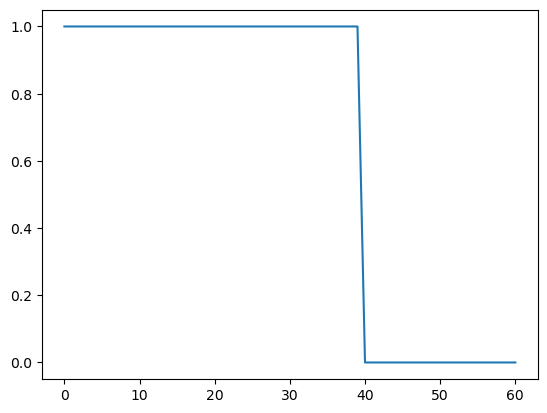

In [35]:
# Fixed lifetime survival curve

fixed_lifetime = 40
survival_curve = np.ones_like(timesteps)
survival_curve[fixed_lifetime:] = 0

plt.plot(survival_curve)
plt.show()

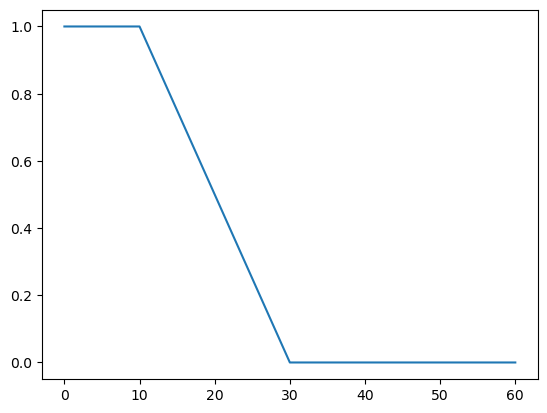

In [36]:
# Uniform distribution
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.uniform.html#scipy.stats.uniform

uniform_dist = uniform(
    loc=10,  # shifts the curve along the x-axis (starting point)
    scale=20,  # controls the width (ending point)
)
survival_curve = uniform_dist.sf(timesteps)  # sf = survival function
plt.plot(survival_curve)
plt.show()

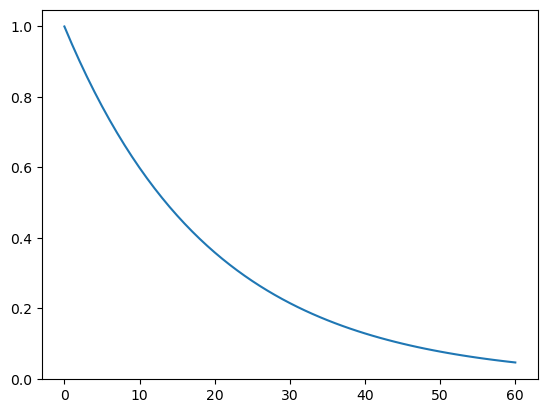

In [37]:
# Geometric distribution
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.geom.html#scipy.stats.geom

geom_dist = geom(
    p=0.05,  # controls the depreciation rate
    loc=0,  # shifts the curve along the x-axis (starting point)
)
survival_curve = geom_dist.sf(timesteps)  # sf = survival function
plt.plot(survival_curve)
plt.show()

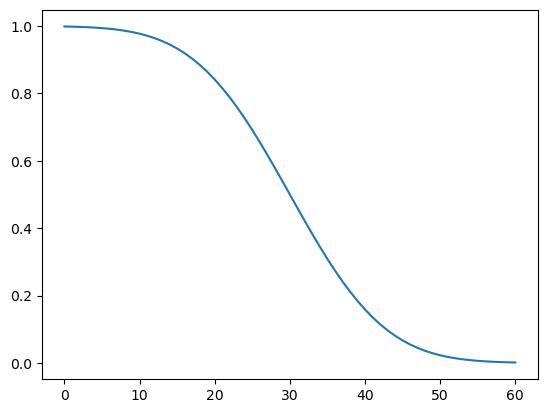

In [38]:
# Normal distribution
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html#scipy.stats.norm

norm_dist = norm(
    loc=30,  # shifts the center of the curve (mean point)
    scale=10,  # Controls the spread of the curve (standard deviation)
)
survival_curve = norm_dist.sf(timesteps)  # sf = survival function
plt.plot(survival_curve)
plt.show()

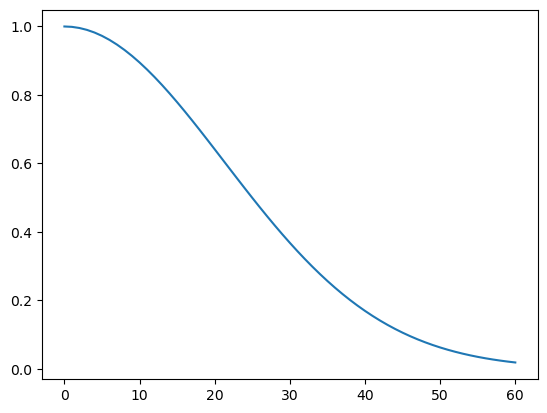

In [39]:
# Weibull distribution
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.weibull_min.html

weibull_dist = weibull_min(
    c=2,  # controls the shape of the curve (skewness)
    loc=0,  # shifts the curve along the x-axis (starting point)
    scale=30,  # Stretches or compresses the curve along the x-axis (spread)
)
survival_curve = weibull_dist.sf(timesteps)  # sf = survival function

plt.plot(survival_curve)
plt.show()

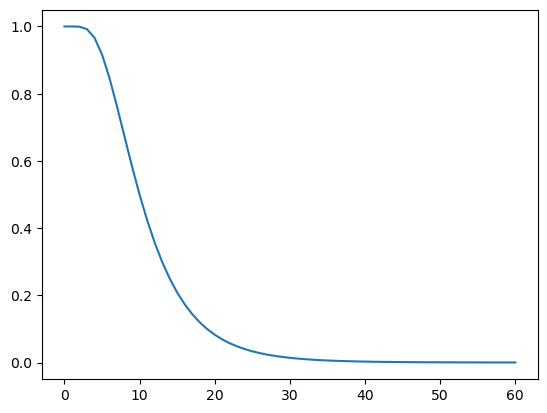

In [40]:
# Lognormal distribution
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.lognorm.html#scipy.stats.lognorm

lognorm_dist = lognorm(
    s=0.5,  # controls the shape of the curve (skewness)
    loc=0,  # shifts the curve along the x-axis (starting point)
    scale=10,  # controls the stretch of the distribution
)

survival_curve = lognorm_dist.sf(timesteps)  # sf = survival function

plt.plot(survival_curve)
plt.show()

# Create a survival curve matrix


In [41]:
# create survival curve matrix with placeholder zeros
survival_curve_matrix = pd.DataFrame(0, index=timesteps, columns=timesteps, dtype=float)

# populate the survival curve matrix with shifted curves, column by column using slices
for step in timesteps:
    # at each iteration, we stop 1 index earlier
    last_idx = step_max - step
    # we slice the survival curve up to that last index
    values = survival_curve[0:last_idx]
    # and we assign the sliced values to the sliced matrix:
    # --> rows: from step to step_max
    # --> columns: only the current step
    survival_curve_matrix.loc[step:step_max, step] = values

survival_curve_matrix

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,0.999998,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,0.999357,0.999998,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,0.991979,0.999357,0.999998,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
4,0.966568,0.991979,0.999357,0.999998,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,0.000285,0.000325,0.000372,0.000426,0.000488,0.000560,0.000643,0.000740,0.000853,0.000984,...,0.917171,0.966568,0.991979,0.999357,0.999998,1.000000,0.000000,0.000000,0.000000,0.0
57,0.000250,0.000285,0.000325,0.000372,0.000426,0.000488,0.000560,0.000643,0.000740,0.000853,...,0.846527,0.917171,0.966568,0.991979,0.999357,0.999998,1.000000,0.000000,0.000000,0.0
58,0.000219,0.000250,0.000285,0.000325,0.000372,0.000426,0.000488,0.000560,0.000643,0.000740,...,0.762185,0.846527,0.917171,0.966568,0.991979,0.999357,0.999998,1.000000,0.000000,0.0
59,0.000193,0.000219,0.000250,0.000285,0.000325,0.000372,0.000426,0.000488,0.000560,0.000643,...,0.672305,0.762185,0.846527,0.917171,0.966568,0.991979,0.999357,0.999998,1.000000,0.0


<Axes: >

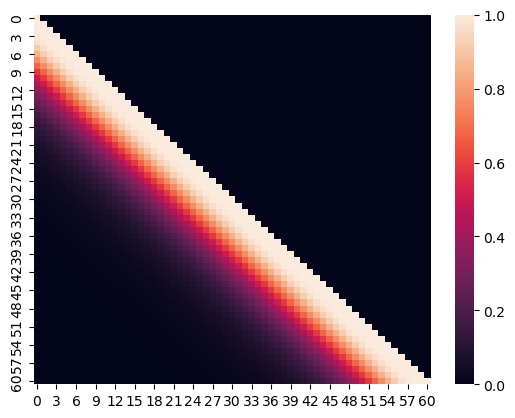

In [42]:
sns.heatmap(survival_curve_matrix, annot=False)

# Flow driven model


In [43]:
# This is our model input
inflows = data["inflow"]
inflows

year
1990    13
1991    14
1992    12
1993    10
1994     7
        ..
2046    66
2047    67
2048    70
2049    77
2050    80
Name: inflow, Length: 61, dtype: int64

In [44]:
# create survival matrix with placeholder zeros
cohort = pd.DataFrame(0, index=timesteps, columns=timesteps, dtype=float)

# multiply the inflow with the shifted curves to get the cohorts' behavior over time
for time in timesteps:
    # the line below is the same as for stock driven models
    cohort.loc[:, time] = survival_curve_matrix.loc[:, time] * inflows.iloc[time]

# set index and columns to years instead of timesteps
cohort.index = years
cohort.columns = years

cohort

year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
year,,,,,,,,,,,,,,,,,,,,,
1990,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1991,12.999973,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1992,12.991635,13.999971,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1993,12.895723,13.990991,11.999975,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1994,12.565379,13.887702,11.992278,9.999979,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,0.003705,0.004556,0.004465,0.004259,0.003416,0.011201,0.014156,0.017026,0.023877,0.029509,...,60.533318,61.860325,64.478616,69.954957,64.999866,66.000000,0.000000,0.000000,0.000000,0.0
2047,0.003248,0.003990,0.003905,0.003720,0.002981,0.009761,0.012321,0.014800,0.020728,0.025583,...,55.870782,58.698975,62.826893,69.438510,64.958174,65.999864,67.000000,0.000000,0.000000,0.0
2048,0.002851,0.003498,0.003420,0.003254,0.002604,0.008517,0.010737,0.012881,0.018017,0.022208,...,50.304234,54.177728,59.616146,67.659731,64.478616,65.957531,66.999862,70.000000,0.000000,0.0


<Axes: xlabel='year', ylabel='year'>

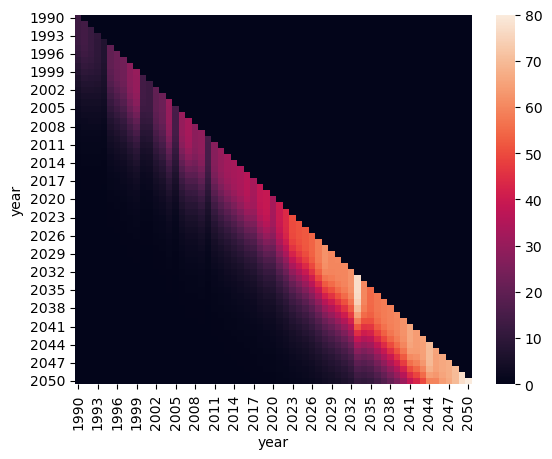

In [45]:
sns.heatmap(cohort, annot=False)

In [46]:
# calculate flows & stocks using the cohort
stock = cohort.sum(axis=1)
nas = np.diff(stock, prepend=0)  # prepending 0 assumes no initial stock
outflows = inflows - nas

# Visualize the results


In [47]:
data["stock"] = stock
data["outflow"] = outflows
data["nas"] = nas

data

,stock,inflow,outflow,nas
year,,,,
1990,13.000000,13,0.000000,13.000000
1991,26.999973,14,0.000027,13.999973
1992,38.991606,12,0.008367,11.991633
1993,48.886690,10,0.104916,9.895084
1994,55.445338,7,0.441352,6.558648
...,...,...,...,...
2046,738.601164,66,59.183656,6.816344
2047,745.822400,67,59.778764,7.221236
2048,755.360697,70,60.461703,9.538297


<Axes: xlabel='year'>

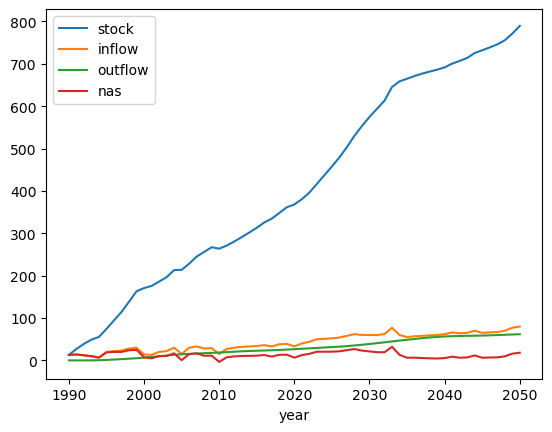

In [50]:
# Visualize on the same plot
data.plot()

<Axes: xlabel='year'>

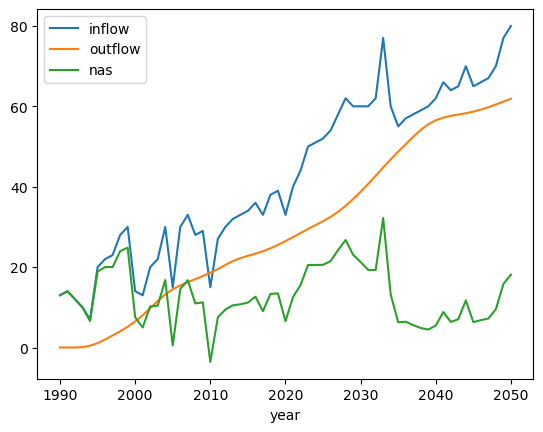

In [48]:
# Zooming in the flows and net addition to stock
data[["inflow", "outflow", "nas"]].plot()

<Axes: xlabel='year'>

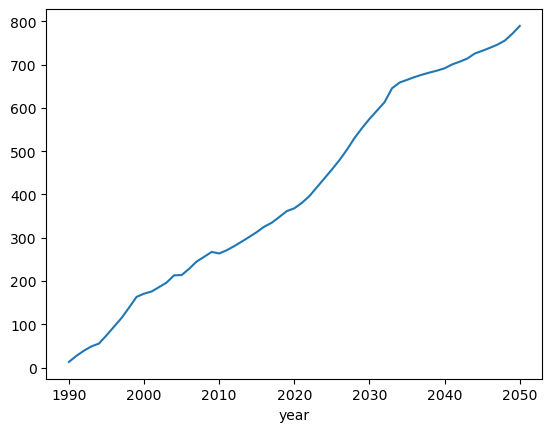

In [49]:
# Zooming in the stocks
data["stock"].plot()

# Export output data to Excel


In [ ]:
# Save the data to an Excel file
# (you may need to create the folder if it doesn't exist)
file_path = BASE_DIR / "data" / "processed" / "week_2_tutorial_myname.xlsx"
data.to_excel(file_path, sheet_name="flow_driven")

In [19]:
# But we also want to save the cohort data in the same excel file
# without overwriting the file.
# To do that, we open an Excel file in append mode ('a')
# https://pandas.pydata.org/docs/reference/api/pandas.ExcelWriter.html

with pd.ExcelWriter(file_path, mode="a") as writer:
    cohort.to_excel(writer, sheet_name="cohort_flow_driven")

# Going further


In [20]:
# Instead of a numpy array, we store the survival curve
# as a pandas Series with the appropriate index (= years)
sf = pd.Series(survival_curve, index=years)
sf

year
1990    1.000000
1991    0.999998
1992    0.999357
1993    0.991979
1994    0.966568
          ...   
2046    0.000285
2047    0.000250
2048    0.000219
2049    0.000193
2050    0.000169
Length: 61, dtype: float64

In [21]:
# create survival curve matrix with placeholder zeros (same as before)
survival_curve_matrix2 = pd.DataFrame(0, index=years, columns=years, dtype=float)

# populate the survival curve matrix with shifted curves, column by column using slices
for counter, year in enumerate(years):
    # at each iteration, we stop 1 year earlier
    last_idx = end_year - counter
    # we slice the survival curve up to that last year
    values = sf.loc[:last_idx].values
    # and we assign the sliced values to the sliced matrix:
    # --> rows: from current year to the end year
    # --> columns: only the current year
    survival_curve_matrix2.loc[year:end_year, year] = values

# notice the names of the columns and rows
# are now years instead of timesteps
survival_curve_matrix2

year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
year,,,,,,,,,,,,,,,,,,,,,
1990,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1991,0.999998,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1992,0.999357,0.999998,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1993,0.991979,0.999357,0.999998,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1994,0.966568,0.991979,0.999357,0.999998,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,0.000285,0.000325,0.000372,0.000426,0.000488,0.000560,0.000643,0.000740,0.000853,0.000984,...,0.917171,0.966568,0.991979,0.999357,0.999998,1.000000,0.000000,0.000000,0.000000,0.0
2047,0.000250,0.000285,0.000325,0.000372,0.000426,0.000488,0.000560,0.000643,0.000740,0.000853,...,0.846527,0.917171,0.966568,0.991979,0.999357,0.999998,1.000000,0.000000,0.000000,0.0
2048,0.000219,0.000250,0.000285,0.000325,0.000372,0.000426,0.000488,0.000560,0.000643,0.000740,...,0.762185,0.846527,0.917171,0.966568,0.991979,0.999357,0.999998,1.000000,0.000000,0.0


<Axes: xlabel='year', ylabel='year'>

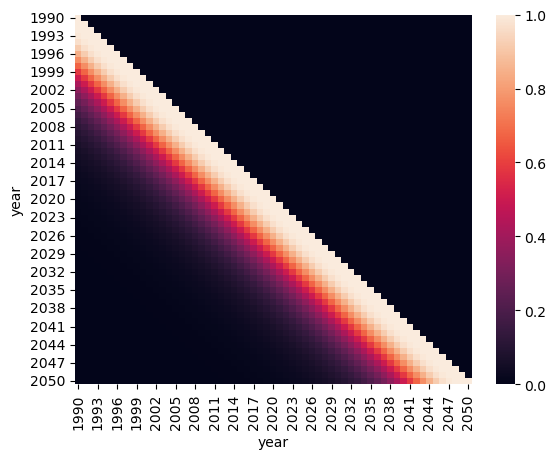

In [22]:
# notice the names of the columns and rows
# are now years instead of timesteps
sns.heatmap(survival_curve_matrix2, annot=False)

There are different types of matrix multiplications:

- the **dot product** (using the `np.dot()` function or the `@` operator)?
- the **element-wise matrix multiplication** (`np.multiply()` function or `*` operator)

The element-wise matrix multiplication does the following:

$$
\begin{bmatrix}
a_{11} & a_{12} & a_{13} \\
a_{21} & a_{22} & a_{23} \\
a_{31} & a_{32} & a_{33} \\
\end{bmatrix}
*
\begin{bmatrix}
f_1 \\
f_2 \\
f_3
\end{bmatrix}
=
\begin{bmatrix}
a_{11} f_1  & a_{12} f_1 & a_{13} f_1 \\
a_{21} f_2  & a_{22} f_2 & a_{23} f_2 \\
a_{31} f_3  & a_{32} f_3 & a_{33} f_3 \\
\end{bmatrix}
$$

Now assuming that

- the matrix $\mathbf{A}$ represents the `survival_curve_matrix`
- and the vector $\mathbf{f}$ represents the `inflows`,

we get:

$$
\begin{bmatrix}
a_{1} & 0 & 0 \\
a_{2} & a_{1} & 0 \\
a_{3} & a_{2} & a_{1} \\
\end{bmatrix}
*
\begin{bmatrix}
f_1 \\
f_2 \\
f_3
\end{bmatrix}
=
\begin{bmatrix}
a_{1} f_1 & 0 & 0 \\
a_{2} f_1 & a_{1} f_2 & 0 \\
a_{3} f_1 & a_{2} f_2 & a_{1} f_3  \\
\end{bmatrix}
$$

You may recognize the `cohort` matrix $\mathbf{C}$ as the result.

In other words, the **element-wise matrix multiplication** saves us from having to do a `for loop`


In [27]:
# no need to do a for loop with the element wise multiplication
cohort2 = survival_curve_matrix2 * inflows
cohort2

year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
year,,,,,,,,,,,,,,,,,,,,,
1990,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1991,12.999973,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1992,12.991635,13.999971,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1993,12.895723,13.990991,11.999975,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1994,12.565379,13.887702,11.992278,9.999979,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,0.003705,0.004556,0.004465,0.004259,0.003416,0.011201,0.014156,0.017026,0.023877,0.029509,...,60.533318,61.860325,64.478616,69.954957,64.999866,66.000000,0.000000,0.000000,0.000000,0.0
2047,0.003248,0.003990,0.003905,0.003720,0.002981,0.009761,0.012321,0.014800,0.020728,0.025583,...,55.870782,58.698975,62.826893,69.438510,64.958174,65.999864,67.000000,0.000000,0.000000,0.0
2048,0.002851,0.003498,0.003420,0.003254,0.002604,0.008517,0.010737,0.012881,0.018017,0.022208,...,50.304234,54.177728,59.616146,67.659731,64.478616,65.957531,66.999862,70.000000,0.000000,0.0


In [25]:
# Check that they are indeed the same
# always use np.allclose() instead of == to compare floats
np.allclose(cohort2, cohort)

True

<Axes: xlabel='year', ylabel='year'>

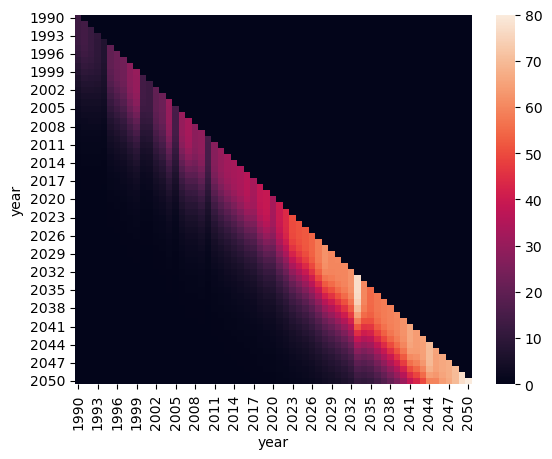

In [26]:
sns.heatmap(cohort2, annot=False)

# More information and tips


- [Statistical functions in scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html)
- the `enumerate()` function on [W3school](https://www.w3schools.com/python/ref_func_enumerate.asp) or [Programiz](https://www.programiz.com/python-programming/methods/built-in/enumerate)
- [Pandas excel writer](https://pandas.pydata.org/docs/reference/api/pandas.ExcelWriter.html)
- [Element wise multiplication](https://www.sharpsightlabs.com/blog/numpy-multiply/) (also known as [Hadamard product](<https://en.wikipedia.org/wiki/Hadamard_product_(matrices)>))
